# Naive Bayes
Naive Bayes is one of the most famous classification techniques, one of the most simplest ones, and the easiest to apply.

## Evaluation Metrics
https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

### Accuracy
_Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right._

**A = (TP+TN)/(TP+TN+FP+FN)**


### Recall
_What proportion of actual positives was identified correctly?_

**R = TP/(TP+FN)**

### Precision
_What proportion of positive identifications was actually correct?_

**P = TP/(TP+FP)**

## Oral Toxicity Dataset
We will be using the Oral Toxicity Dataset with the out of the box values.

### Imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


### Prepare and split data

In [2]:
y: np.ndarray = data.pop(1024).values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

### Gaussian Naive Bayes Estimator

In [3]:
clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

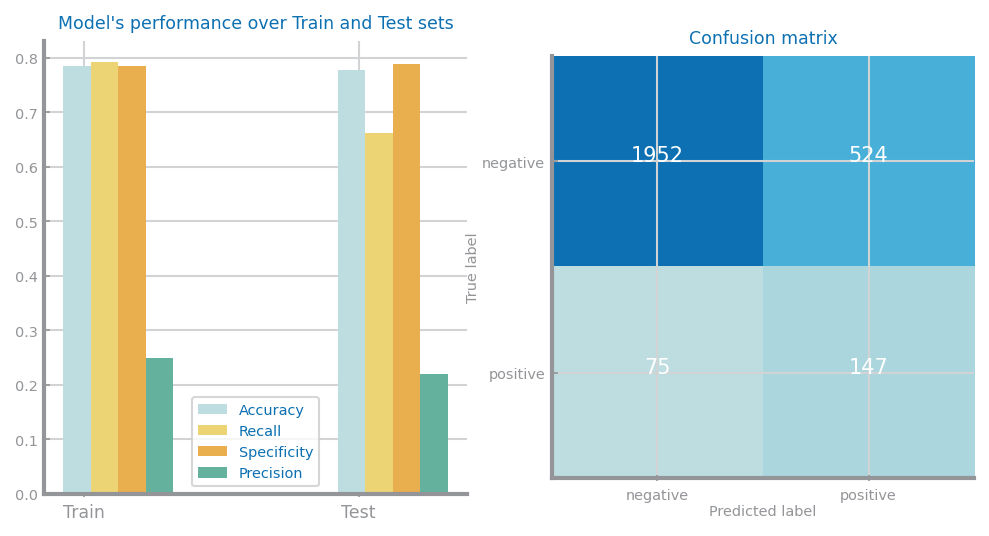

In [4]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Multinomial Naive Bayes Estimator

In [5]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

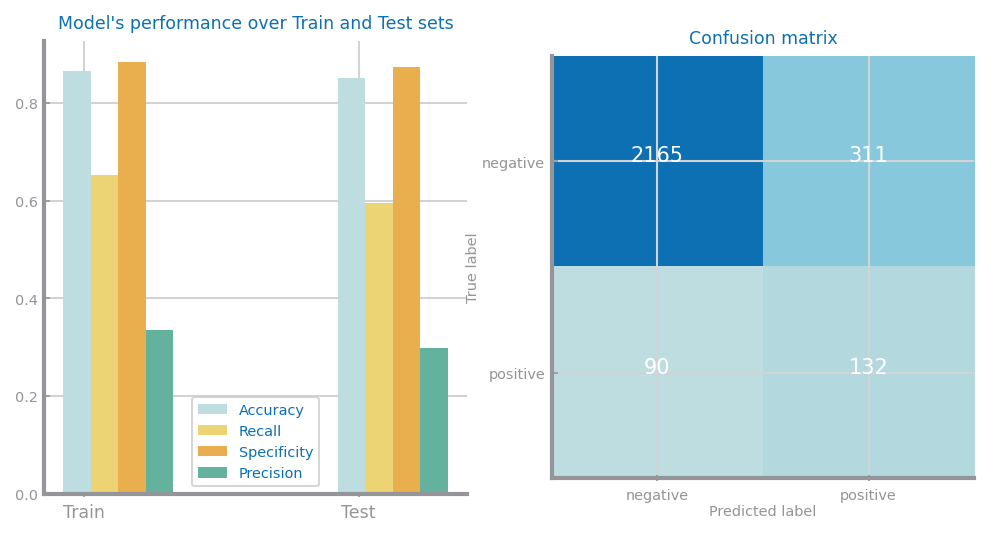

In [6]:
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Bernoulli Naive Bayes Estimator

In [7]:
clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

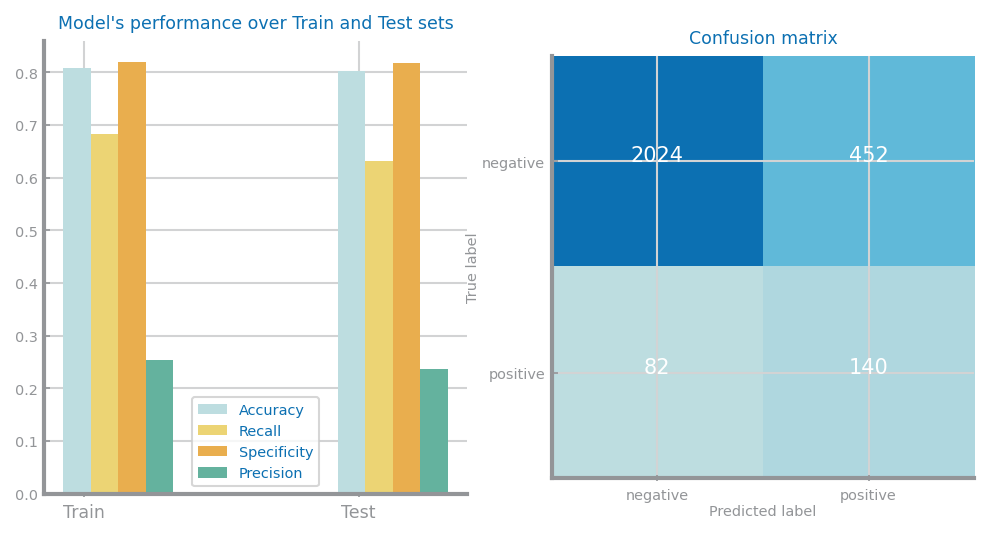

In [8]:
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Comparison

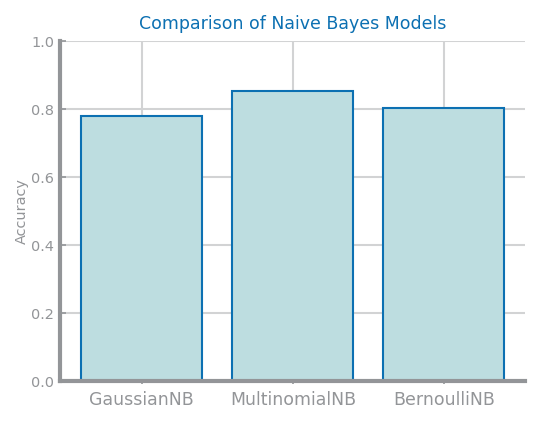

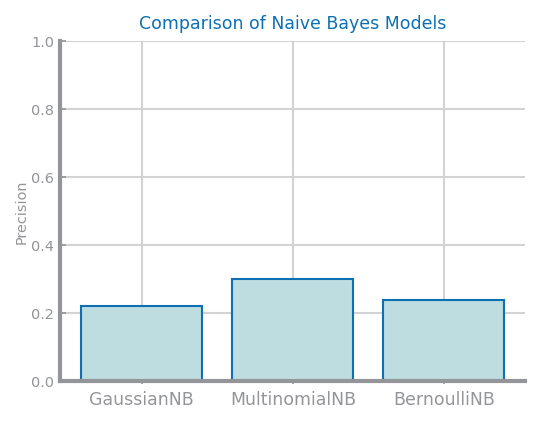

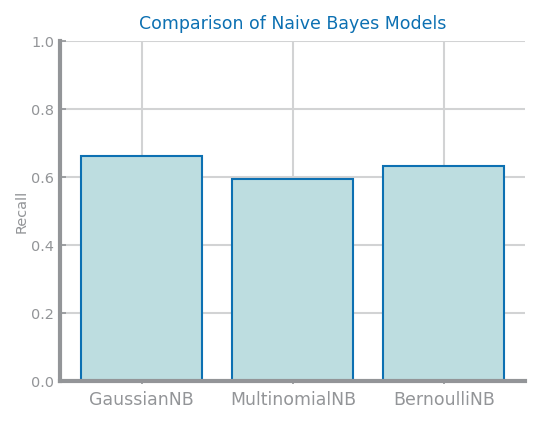

In [9]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

# Accuracy
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
plt.show()



# Precision
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.precision_score(tstY, prdY, pos_label="positive"))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)
plt.show()


# Recall
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY, pos_label="positive"))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)
plt.show()


## Summary

**Which distribution is more adequate to model our data??**
- Our best results were obtained when using either the Multinomial or Bernoulli estimators (moreso the Multinomial)

**Is the accuracy achieved good enough??**
- The best accuracy obtained was when using the Multinomial NB estimator, which got around 85% accuracy on the test set

**What is the largest kind of errors??**
- Most of our problems lied in False Positives (but we also caught some False Negatives)

<br/>
<br/>
<br/>
<br/>
<br/>

## Oral Toxicity Dataset - Balanced
We will be using the Balanced Oral Toxicity Dataset with the out of the box values.

### Imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/oral_balanced/ORAL_balanced.csv', sep=';', header=None)    
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


### Prepare and split data

In [2]:
y: np.ndarray = data.pop(1024).values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

### Gaussian Naive Bayes Estimator

In [3]:
clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

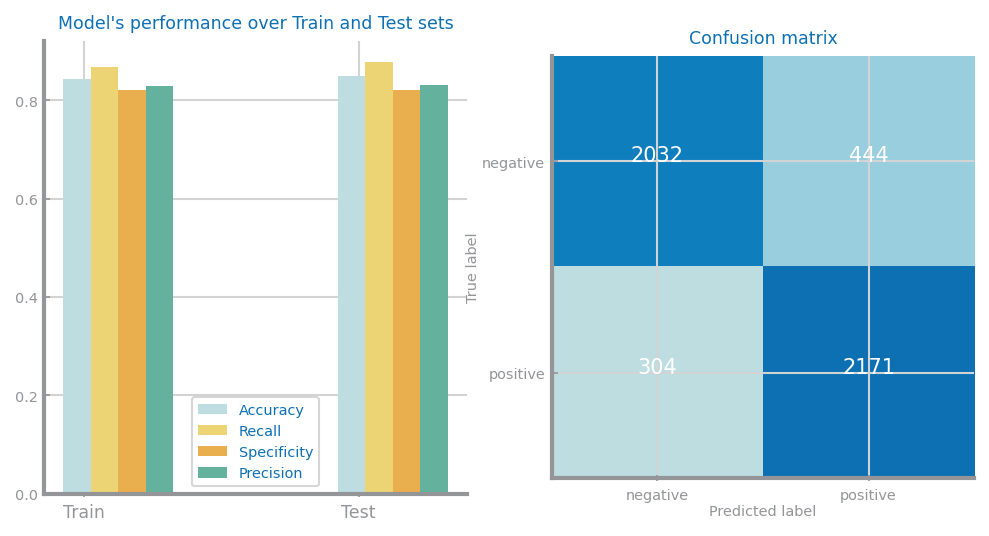

In [4]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Multinomial Naive Bayes Estimator

In [5]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

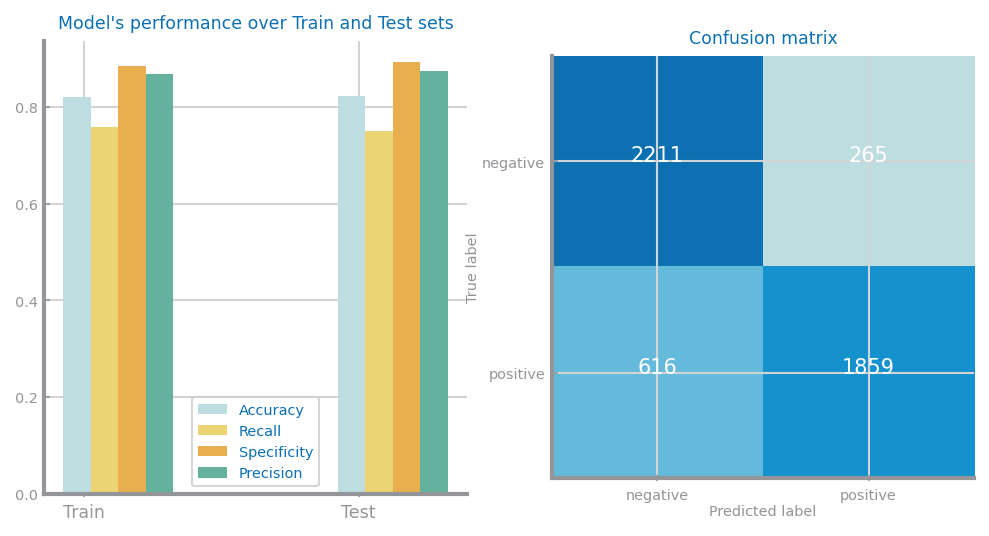

In [6]:
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Bernoulli Naive Bayes Estimator

In [7]:
clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

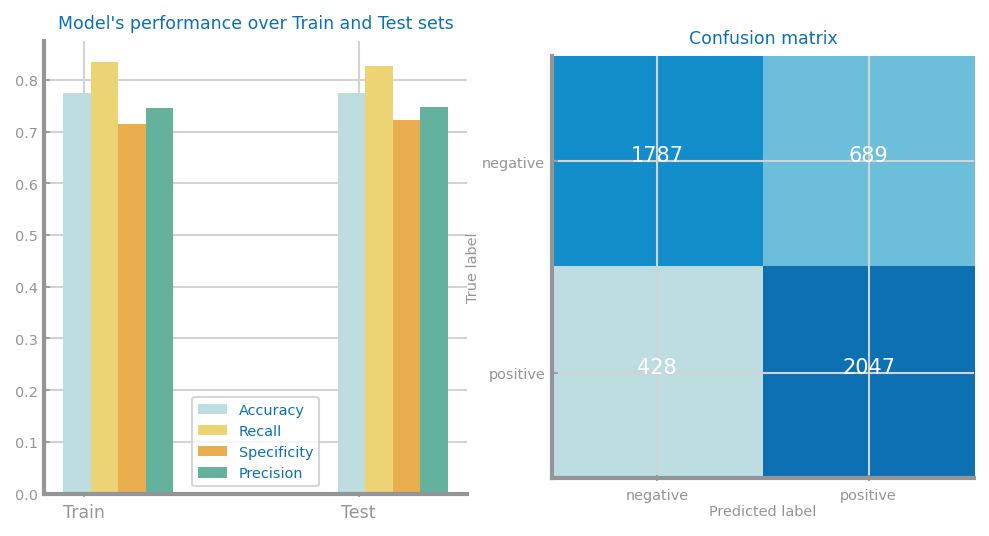

In [8]:
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Comparison

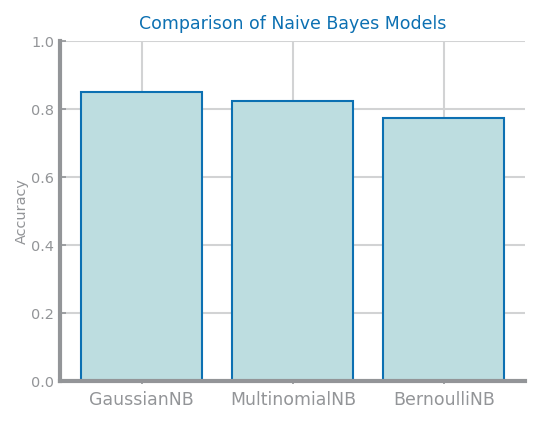

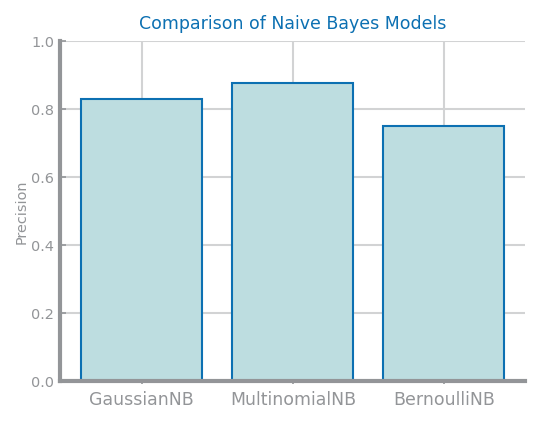

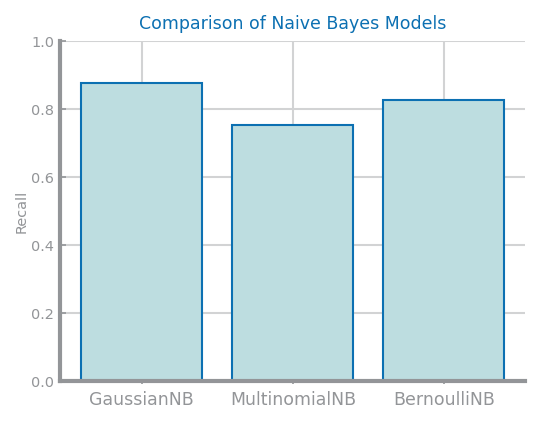

In [9]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

# Accuracy
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
plt.show()



# Precision
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.precision_score(tstY, prdY, pos_label="positive"))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)
plt.show()


# Recall
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY, pos_label="positive"))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)
plt.show()


<br/>
<br/>
<br/>
<br/>
<br/>

## Reduced Oral Toxicity Dataset - Balanced
We will be using the Balanced Oral Toxicity Dataset with the out of the box values.

### Imports and data loading

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/ORAL_balanced_reduced32.csv', sep=';', header=None)    
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,00000000001000001000000000000000,00000000100000000000000000000000,00000000000000100010000000001000,00000000000000000000000000000000,00000000000000000000000000000000,00000000000000000011100001000000,00100000000000000000000000000010,01000000000000000000000000000000,00000000000100000000000000000000,10000000000000000000000000000000,...,00010000000000000000001100000000,00000000000000000010100000000000,00000000000000000000000000000000,00000000000000000000000000000000,00000001000000000000000000000000,00000000010000000000000000000000,01000000100000000000000000000000,10000000001000001000000001000100,00000000000000000000000000000000,negative
1,00100000001000001000000000000000,00000000000000000000000000000000,00000000000000100000000000001000,00000000000000000000000000000000,00000000000000000000000000000000,00000000000000000010100001001000,00000000000100000000000000000010,00000000000000000000000000000000,00000000000000000000000000000000,10000000000000000000000000000010,...,00000000000000000000001100000000,00000000000000000010100000000000,00000000000000000000000000000000,00000000001000000000000000000000,00000001000000000100000000000000,00000010011000000000000000000000,01000000100000000000000000000000,10010000001000001000000001000000,00010000000000010000000000000000,negative
2,00000000001000001000000000000000,00000000000100000000000000000000,00000000000000100000000000001000,00000000000000000000000000000000,00000000000000000000000000000000,00000000001000000010100001000000,00000000000000000000000000000010,00000000000000000000000000000000,00000000000000000000000000000000,10000000000000000000010001000000,...,00000000000000000000001100000000,00000000000000000000100000000000,00000000000000000000000000000000,00000000000000000000000000000000,00000001000000000000000000101000,00000010010000000000000001000000,01000000100000000000000000000000,10000000001100001000000001000000,00110000000000000000000001000000,negative
3,00000001001000001000000000000000,00000000000000000000000000000000,00000000000000100000000000001010,00000000000000000000000000000000,00010000000000000000000000000000,00000000000000000010100001000000,00000000000000000000000000000010,00000000000000000000000001000000,00000000000000000000000000000000,10000000000000000000000000000000,...,00000000000000000000001100000000,00000000000000000000100000000000,00000000000000000000000000000000,00000000000000000000000000000000,00000001010000000000010000000000,00000010010000000000000000000000,01001000100000000000000000000000,10000000001000001000000001000000,00010000000000001000000000000000,negative
4,00000000000001001000000000000000,00000000100000000000000000010000,00000000000000100000000000001000,00001000000000000000000000000000,00000000000000000000000000010000,00000000000000000000010000000000,00000000000101000000100000000010,00000000000000000000000001000000,00001000000000000000000000000000,10000000010000000000000000001000,...,01000000000000000000001100000000,00000000000000000000000000001010,00000000000001000001000000000000,00000000000000000000000000000000,00000001000000000100000000000000,00000010010000000000000000000000,00000010000000000000000000100000,10000000001000001000000001000000,00010100000000010000000000000000,negative


### Prepare and split data

In [11]:
y: np.ndarray = data.pop(32).values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
train_size = 0.7 # % of records used for train (the remainder will be left for test)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

### Gaussian Naive Bayes Estimator

In [12]:
clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

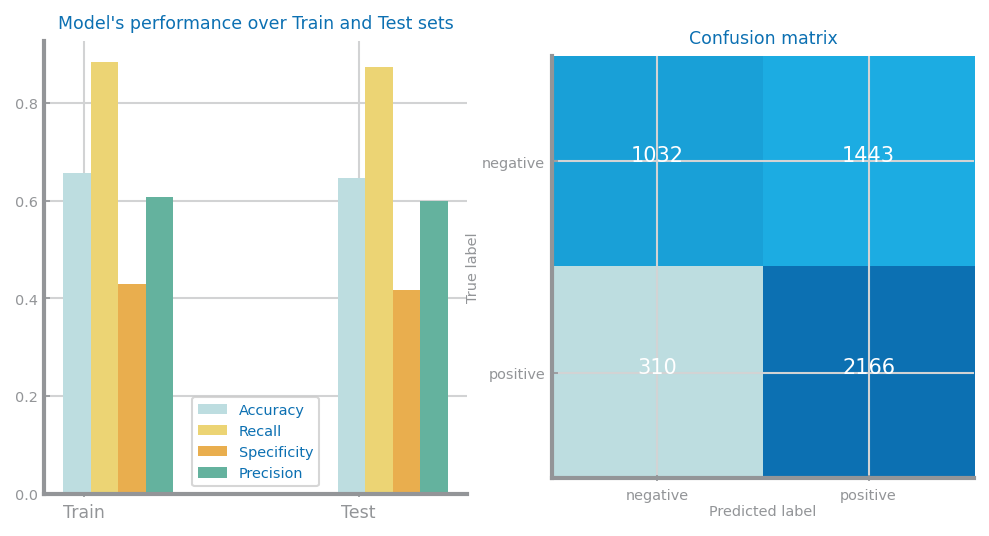

In [13]:
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

### Multinomial Naive Bayes Estimator

In [14]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

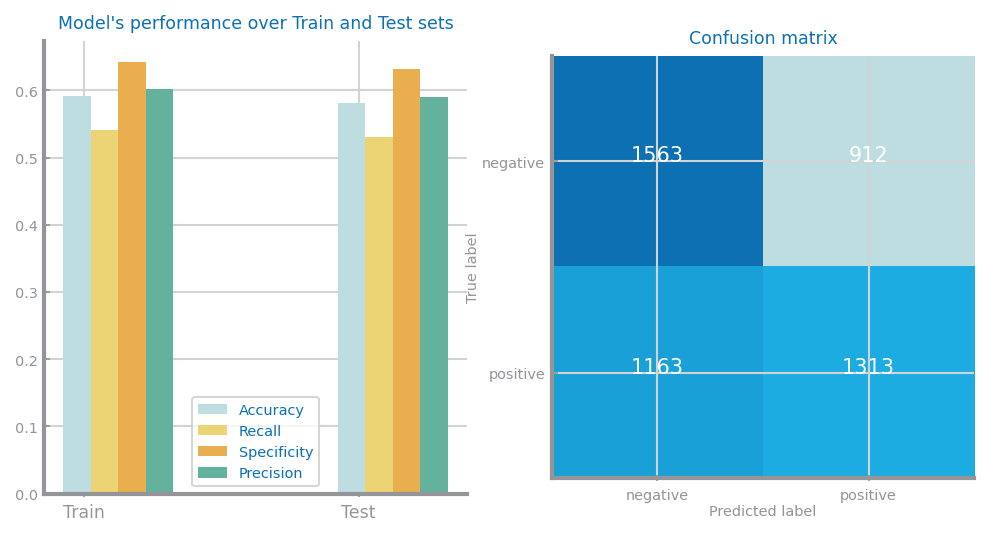

In [15]:
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Bernoulli Naive Bayes Estimator

In [16]:
clf = BernoulliNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)

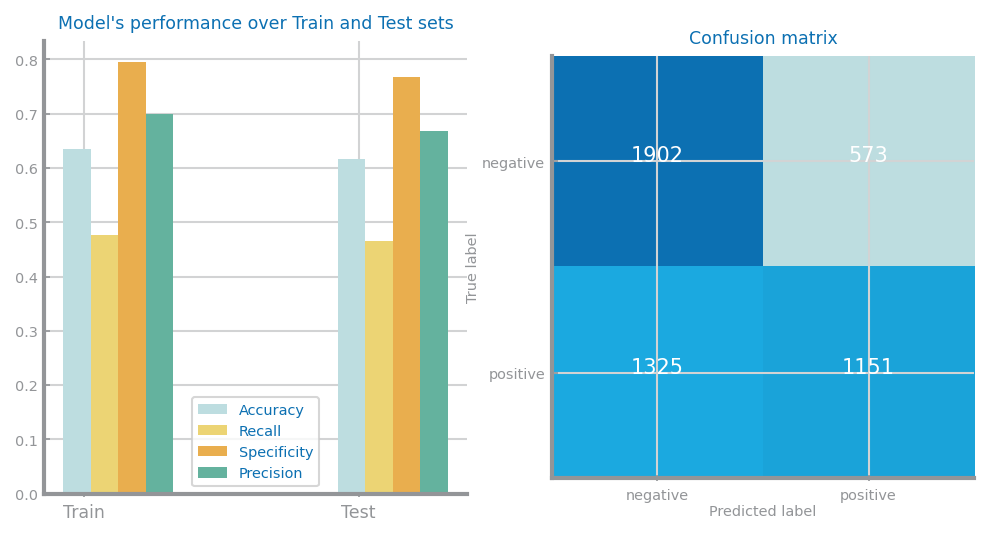

In [17]:
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Comparison

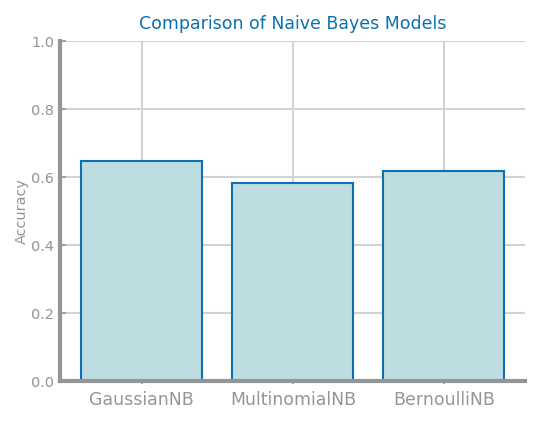

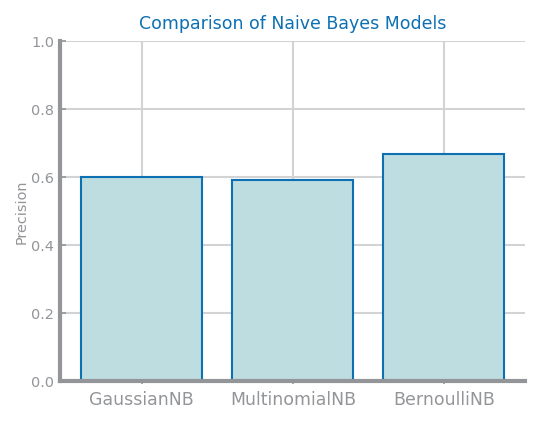

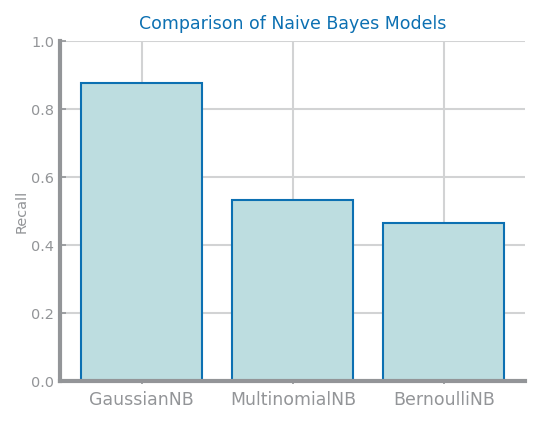

In [18]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

# Accuracy
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
plt.show()



# Precision
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.precision_score(tstY, prdY, pos_label="positive"))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Precision', percentage=True)
plt.show()


# Recall
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.recall_score(tstY, prdY, pos_label="positive"))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='Recall', percentage=True)
plt.show()
